In [1]:
import numpy as np
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = '/Users/ahirschauer/Documents/Year2/03-2019/NGC6822/MASTERCATALOG_ahirschauer.csv'

In [3]:
data = ascii.read(file, fill_values='null')

In [4]:
data.colnames

['ID',
 'RA',
 'Dec',
 'k36mag',
 'e36mag',
 'd36mag',
 'k45mag',
 'e45mag',
 'd45mag',
 'k58mag',
 'e58mag',
 'd58mag',
 'k80mag',
 'e80mag',
 'd80mag',
 'k24mag',
 'e24mag',
 'dstArcSec',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'eJmag',
 'Hmag',
 'eHmag',
 'Kmag',
 'eKmag',
 'CMD1region',
 'CMD2region',
 'CMD3region']

In [5]:
allcagb_idx = np.where((data['CMD1region'] == 2 | 3) & (data['CMD2region'] == 2 | 3) | (data['CMD3region'] == 2)) 

In [6]:
data[allcagb_idx]

len(data[allcagb_idx])

3489

In [7]:
dusty_idx = np.where((data['CMD1region'] < 0 ) & (data['CMD2region'] < 0) & (data['CMD3region'] == 6)) 


In [8]:
dustystuff = data[dusty_idx]


#idx = np.where((dustystuff['CMD1region'] >0 ) & (dustystuff['CMD2region'] > 0) & (dustystuff['CMD1region'] < 2 ) & (dustystuff['CMD2region'] < 2)) 

In [9]:
#dustystuff.show_in_browser(jsviewer=True) 

In [10]:
#plt.figure(figsize=(8,8))
#plt.plot(dustystuff['RA'], dustystuff['Dec'], ',', color='black')

#plt.plot(dustystuff['RA'][idx], dustystuff['Dec'][idx], '.',  color='darkviolet')

#plt.xlabel('Right Ascension', size=12)
#plt.ylabel('Declination', size=12)

#plt.grid(False)
#plt.show()
#plt.close()

In [11]:
print(dustystuff['RA'], dustystuff['Dec'])

    RA   
---------
296.19742
  296.107
 296.4194
296.27317
296.24979
296.15795
296.44104
296.13692
296.26319
 296.1823
      ...
296.21527
296.21502
296.17959
296.07918
296.12528
296.15232
296.07279
296.28144
296.15278
296.10449
296.12903
Length = 13383 rows    Dec   
---------
-14.76734
-14.82464
-14.84166
-14.84772
-14.75229
-14.91775
-14.86496
-14.77568
-14.91289
-14.91775
      ...
-14.69177
-14.65294
-14.90791
-14.76941
-14.77895
 -14.8393
-14.73609
-14.80551
-14.91448
-14.84809
-14.67256
Length = 13383 rows


In [12]:
#dustystuff[idx].show_in_browser(jsviewer=True) 

In [13]:
# buffer

In [14]:
allcagb_idx = np.where((data['CMD1region'] == 2 | 3) & (data['CMD2region'] == 2 | 3) | (data['CMD3region'] == 2)) 

data[allcagb_idx]

len(data[allcagb_idx])

#plt.figure(figsize=(8,8))
#plt.plot(dustystuff['RA'], dustystuff['Dec'], ',', color='black')

#plt.plot(dustystuff['RA'][idx], dustystuff['Dec'][idx], '.',  color='darkviolet')

#plt.xlabel('Right Ascension', size=12)
#plt.ylabel('Declination', size=12)

#plt.grid(False)
#plt.show()
#plt.close()

3489

In [15]:
# buffer

In [16]:
# buffer

In [17]:
# buffer

In [18]:
# buffer

In [19]:
# buffer

In [20]:
# buffer

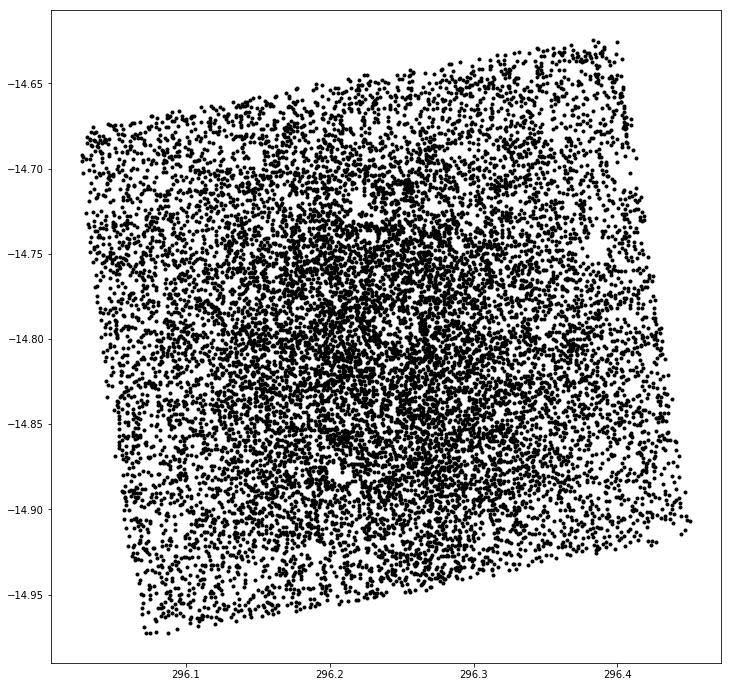

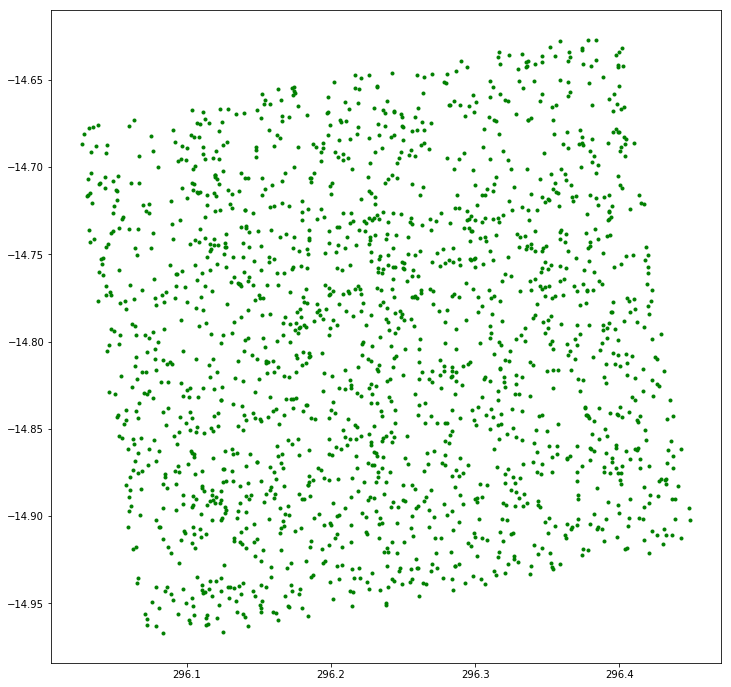

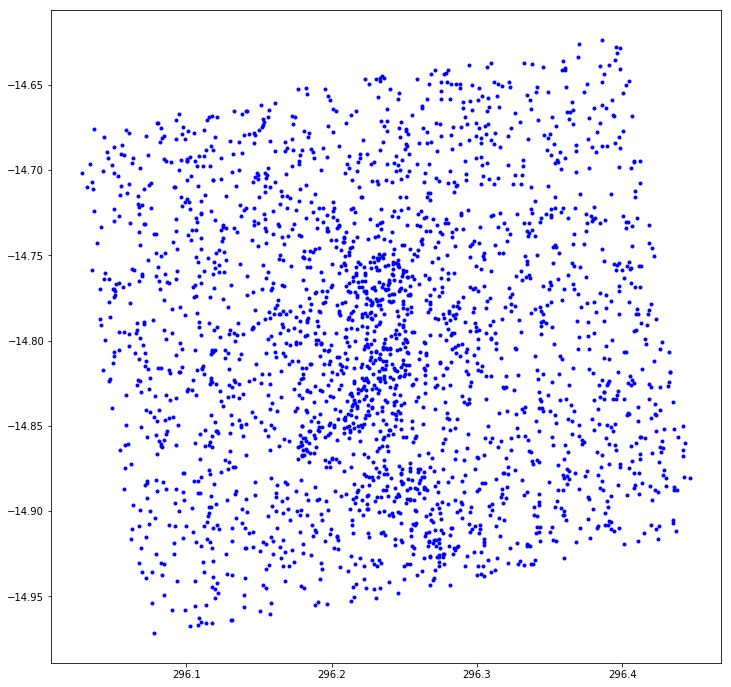

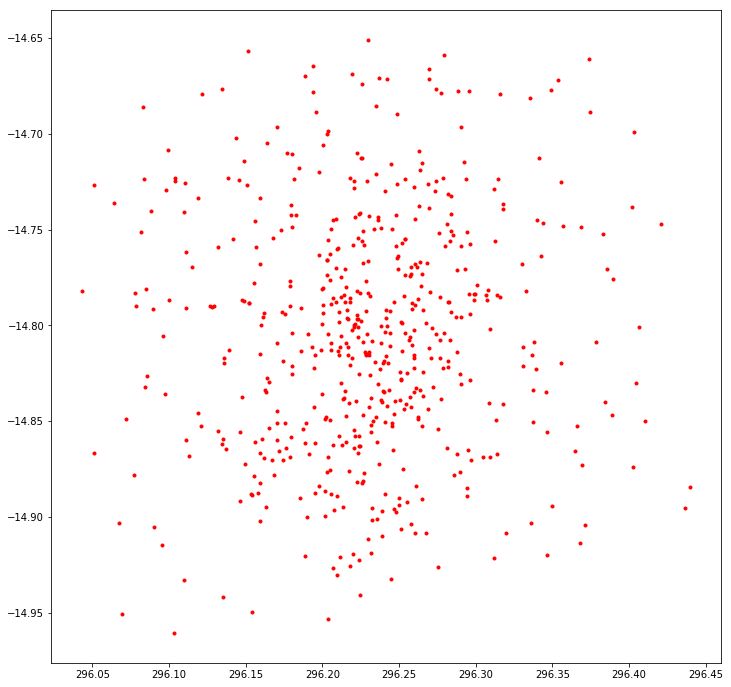

In [21]:
import pandas as pd

MASTERCAT = pd.read_csv('MASTERCATALOG_ahirschauer.csv')

# background galaxies: listed as "null" in CMD 1 and CMD2 (they are faint) and listed as "6" in CMD3

BKG = MASTERCAT[(MASTERCAT.CMD1region < 0) & (MASTERCAT.CMD2region < 0) & (MASTERCAT.CMD3region == 6)]

plt.figure(figsize=(12,12))
plt.plot(BKG.RA, BKG.Dec, '.', color='black')

# foreground stars: listed as "1" or "null" in CMD1 and CMD2 or "1" in CMD3

FGD = MASTERCAT[(MASTERCAT.CMD1region == 1) | (MASTERCAT.CMD1region < 0) & (MASTERCAT.CMD2region == 1) | (MASTERCAT.CMD2region < 0) & (MASTERCAT.CMD3region == 1)]

plt.figure(figsize=(12,12))
plt.plot(FGD.RA, FGD.Dec, '.', color='green')

# high-probability O-rich AGB: listed as "2" or "3" in two or more CMDs

Orich = MASTERCAT[(MASTERCAT.CMD1region == 2) | (MASTERCAT.CMD1region == 3) & (MASTERCAT.CMD2region == 2) | (MASTERCAT.CMD2region == 3) & (MASTERCAT.CMD3region == 2)]

plt.figure(figsize=(12,12))
plt.plot(Orich.RA, Orich.Dec, '.', color='blue')

# high-probability C-rich AGB: listed as "4" in both of the first two CMDs

Crich = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD2region == 4)]# & (MASTERCAT.CMD3region == 4)]

plt.figure(figsize=(12,12))
plt.plot(Crich.RA, Crich.Dec, '.', color='red')

# we'll also want a list of all things not categorized after the above is all said and done

# YSOs and dusty things: requires also a spatial distribution component, matched to SF regions